In [5]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression 
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [6]:
dta =sm.datasets.fair.load_pandas().data
dta['affair'] = (dta.affairs >0).astype(int)
y, X = dmatrices('affair ~ rate_marriage + age +yrs_married + children + religious + educ +(occupation) + C(occupation_husb)',dta, return_type="dataframe")

In [7]:
dta.columns

Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'occupation', 'occupation_husb', 'affairs', 'affair'],
      dtype='object')

In [8]:
X = X.rename(columns =
{'C(occupation)[T.2.0]':'occ_2','C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})
y = np.ravel(y)
X.head()


,Intercept,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ,occupation
0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0,2.0
1,1.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0,3.0
2,1.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0,3.0
3,1.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0,5.0
4,1.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0,3.0


In [9]:
y

array([1., 1., 1., ..., 0., 0., 0.])

In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6366 entries, 0 to 6365
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Intercept      6366 non-null   float64
 1   occ_husb_2     6366 non-null   float64
 2   occ_husb_3     6366 non-null   float64
 3   occ_husb_4     6366 non-null   float64
 4   occ_husb_5     6366 non-null   float64
 5   occ_husb_6     6366 non-null   float64
 6   rate_marriage  6366 non-null   float64
 7   age            6366 non-null   float64
 8   yrs_married    6366 non-null   float64
 9   children       6366 non-null   float64
 10  religious      6366 non-null   float64
 11  educ           6366 non-null   float64
 12  occupation     6366 non-null   float64
dtypes: float64(13)
memory usage: 696.3 KB


In [11]:
X.describe()

,Intercept,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ,occupation
count,6366.0,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,1.0,0.205467,0.076971,0.318882,0.279453,0.083255,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128
std,0.0,0.404074,0.266567,0.466080,0.448766,0.276289,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000
25%,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000
50%,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000
75%,1.0,0.000000,0.000000,1.000000,1.000000,0.000000,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000
max,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000


In [12]:
Corr=X.corr()

In [13]:
Corr

,Intercept,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ,occupation
Intercept,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occ_husb_2,NaN,1.000000,-0.146849,-0.347951,-0.316693,-0.153248,-0.038992,-0.057368,-0.033451,0.001190,0.009990,-0.160756,-0.158331
occ_husb_3,NaN,-0.146849,1.000000,-0.197588,-0.179838,-0.087024,-0.022514,0.011610,0.008046,-0.005538,0.008170,-0.052723,-0.054925
occ_husb_4,NaN,-0.347951,-0.197588,1.000000,-0.426115,-0.206198,0.003303,-0.048989,-0.031121,-0.008032,-0.008491,-0.031422,-0.022170
occ_husb_5,NaN,-0.316693,-0.179838,-0.426115,1.000000,-0.187674,0.003256,0.105525,0.092462,0.053965,-0.000063,0.042540,0.101594
occ_husb_6,NaN,-0.153248,-0.087024,-0.206198,-0.187674,1.000000,0.039561,0.083212,0.042921,0.024260,0.006558,0.223167,0.153994
rate_marriage,NaN,-0.038992,-0.022514,0.003303,0.003256,0.039561,1.000000,-0.111127,-0.128978,-0.129161,0.078794,0.079869,0.039528
age,NaN,-0.057368,0.011610,-0.048989,0.105525,0.083212,-0.111127,1.000000,0.894082,0.673902,0.136598,0.027960,0.106127
yrs_married,NaN,-0.033451,0.008046,-0.031121,0.092462,0.042921,-0.128978,0.894082,1.000000,0.772806,0.132683,-0.109058,0.041782
children,NaN,0.001190,-0.005538,-0.008032,0.053965,0.024260,-0.129161,0.673902,0.772806,1.000000,0.141845,-0.141918,-0.015068


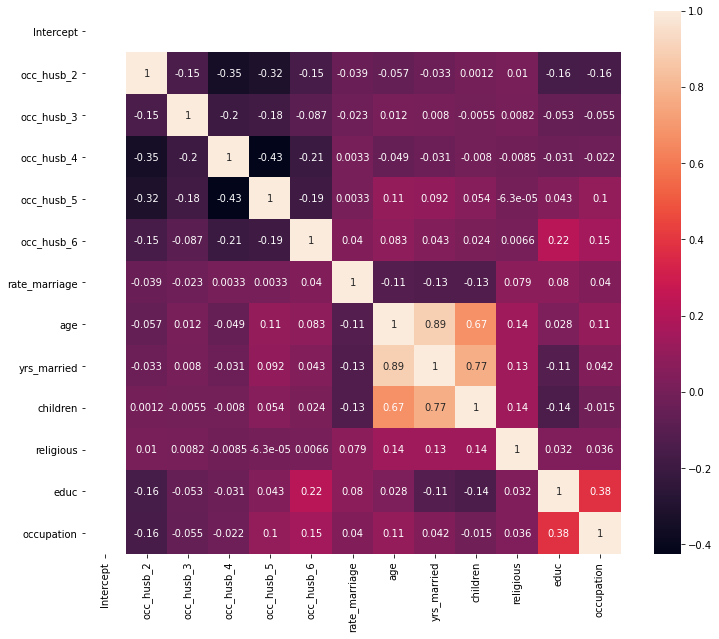

In [14]:

plt.figure(figsize=(12,10))
heat=sns.heatmap(Corr,annot=True)


In [15]:
a=Corr.index
b=Corr.columns
c=[]


for i in range(len(a)):
 for j in range(len(b)):
   if(abs(Corr.iloc[i][j])>0.85):
     if(a[i]!=b[j]): 
         c.append([a[i],b[j]])


c



[['age', 'yrs_married'], ['yrs_married', 'age']]

In [16]:
lm = smf.ols(formula='yrs_married ~ age', data=X).fit()
lm.conf_int()
lm.summary()
lm.pvalues

Intercept    0.0
age          0.0
dtype: float64

In [17]:
#age and yrs_married are corelated so we need to check which is highly corellated with each other 
#so we drop yrs_married

In [18]:
data=X.drop(columns=['yrs_married'])
data.head()

,Intercept,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,children,religious,educ,occupation
0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,3.0,3.0,17.0,2.0
1,1.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,3.0,1.0,14.0,3.0
2,1.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,0.0,1.0,16.0,3.0
3,1.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,4.0,3.0,16.0,5.0
4,1.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,1.0,1.0,14.0,3.0


In [19]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.35,random_state=48)

In [20]:
lr=LogisticRegression(random_state=0)
clf = lr.fit(x_train, y_train)


In [21]:
test=clf.predict(x_test)

In [22]:
a=lr.score(x_train,y_train)
a

0.7215373459028281

In [25]:
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(y_test,test)
conf_mat

array([[1377,  151],
       [ 468,  233]])

In [26]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [27]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.7222969941677883

In [28]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.9011780104712042

In [29]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.7463414634146341